<a href="https://colab.research.google.com/github/pepek1910/LearnKeras/blob/master/MiniImageToolsClassifierFromDysk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dane Image 150x150
# wrench triangle shape
https://www.youtube.com/watch?v=u2TjZzNuly8

In [1]:
import os

shape_dir = os.path.join('/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/shape')
triangle_dir = os.path.join('/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/triangle')
wrench_dir = os.path.join('/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/wrench')

print('total training shape images:', len(os.listdir(shape_dir)))
print('total training triangle images:', len(os.listdir(triangle_dir)))
print('total training wrench images:', len(os.listdir(wrench_dir)))

shape_files = os.listdir(shape_dir)
print(shape_files[:10])

triangle_files = os.listdir(triangle_dir)
print(triangle_files[:10])

wrench_files = os.listdir(wrench_dir)
print(wrench_files[:10])

total training shape images: 696
total training triangle images: 696
total training wrench images: 696
['ksztaltMiniRot0_44.bmp', 'ksztaltMiniRot0_13.bmp', 'ksztaltMiniRot0_18.bmp', 'ksztaltMiniRot0_21.bmp', 'ksztaltMiniRot0_35.bmp', 'ksztaltMiniRot0_5.bmp', 'ksztaltMiniRot0_38.bmp', 'ksztaltMiniRot0_37.bmp', 'ksztaltMiniRot0_4.bmp', 'ksztaltMiniRot0_34.bmp']
['trojkatmini22.bmp', 'trojkatmini52.bmp', 'trojkatmini44.bmp', 'trojkatmini31.bmp', 'trojkatmini47.bmp', 'trojkatmini61.bmp', 'trojkatmini2.bmp', 'trojkatmini8.bmp', 'trojkatmini36.bmp', 'trojkatmini55.bmp']
['kluczMini926.bmp', 'kluczMini917.bmp', 'kluczMini918.bmp', 'kluczMini924.bmp', 'kluczMini923.bmp', 'kluczMini920.bmp', 'kluczMini922.bmp', 'kluczMini921.bmp', 'kluczMini919.bmp', 'kluczMini915.bmp']


/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/shape/ksztaltMiniRot0_44.bmp


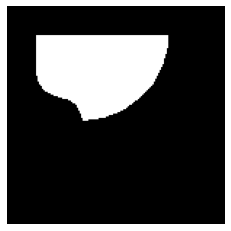

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/shape/ksztaltMiniRot0_13.bmp


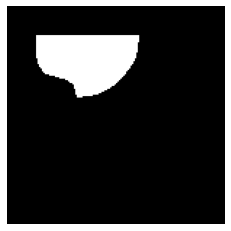

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/triangle/trojkatmini22.bmp


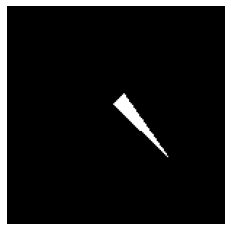

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/triangle/trojkatmini52.bmp


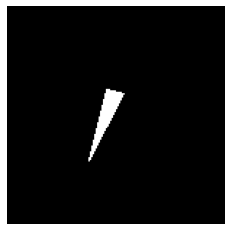

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/wrench/kluczMini926.bmp


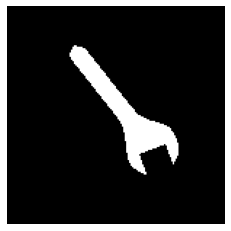

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData/wrench/kluczMini917.bmp


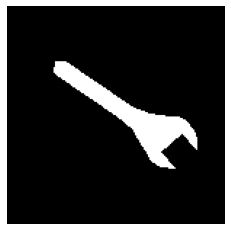

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_shape = [os.path.join(shape_dir, fname) 
                for fname in shape_files[pic_index-2:pic_index]]
next_triangle = [os.path.join(triangle_dir, fname) 
                for fname in triangle_files[pic_index-2:pic_index]]
next_wrench = [os.path.join(wrench_dir, fname) 
                for fname in wrench_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_shape+next_triangle+next_wrench):

  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingMiniData"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TestMiniData"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32 #test z 64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32 #test z 64
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (10,10), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The third convolution
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The fourth convolution
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  #checkpoint_path = "model1/cp.ckpt"
  #checkpoint_dir = os.path.dirname(checkpoint_path)

  #cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True, werbose = 1)

  #history = model.fit(train_generator, epochs=1, steps_per_epoch=1, validation_data = validation_generator, verbose = 1, validation_steps=3,callbacks= [cp_callback])
history = model.fit(train_generator, epochs=5, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("ToolsClassifierModel.h5")


Found 2088 images belonging to 3 classes.
Found 522 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 141, 141, 64)      19264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 313600)            0         
                                                                 
 dropout_1 (Dropout)         (None, 313600)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               160563712 
                                                                 
 dense_3 (Dense)             (None, 3

In [ ]:
# #Save Model
# #https://www.youtube.com/watch?v=HxtBIwfy0kM
# #model.save_weights('./checkpoints/my_checkpoint')
# #model.load_weights('./checkpoints/my_checkpoint')
# #!ls {checkpoint_dir}
# #to powinno zadzialac
# # Load Model
# import tensorflow as tf
# model = tf.keras.models.load_model('/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/rps.h5')

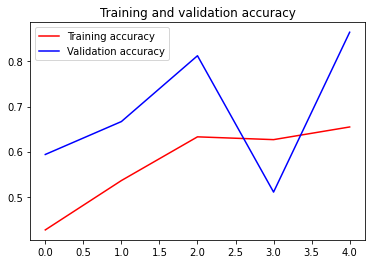

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [7]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(fn)
  print(classes)
  
  score = tf.nn.softmax(images)

  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score)))

Saving kluczMini163.bmp to kluczMini163 (4).bmp
Saving kluczMini204.bmp to kluczMini204 (4).bmp
Saving kluczMini329.bmp to kluczMini329 (5).bmp
Saving kluczMini415.bmp to kluczMini415 (5).bmp
Saving kluczMini528.bmp to kluczMini528 (4).bmp
Saving kluczMini702.bmp to kluczMini702 (4).bmp
Saving kluczMini818.bmp to kluczMini818 (4).bmp
Saving kluczMini945.bmp to kluczMini945 (4).bmp
Saving kluczMini949.bmp to kluczMini949 (4).bmp
Saving kluczMini1023.bmp to kluczMini1023 (4).bmp
Saving ksztaltMiniRot0_2.bmp to ksztaltMiniRot0_2 (4).bmp
Saving ksztaltMiniRot15_42.bmp to ksztaltMiniRot15_42 (4).bmp
Saving ksztaltMiniRot45_43.bmp to ksztaltMiniRot45_43 (4).bmp
Saving ksztaltMiniRot90_2.bmp to ksztaltMiniRot90_2 (4).bmp
Saving ksztaltMiniRot120_19.bmp to ksztaltMiniRot120_19 (5).bmp
Saving ksztaltMiniRot150_18.bmp to ksztaltMiniRot150_18 (5).bmp
Saving ksztaltMiniRot180_23.bmp to ksztaltMiniRot180_23 (4).bmp
Saving ksztaltMiniRot210_12.bmp to ksztaltMiniRot210_12 (4).bmp
Saving ksztaltMiniRo

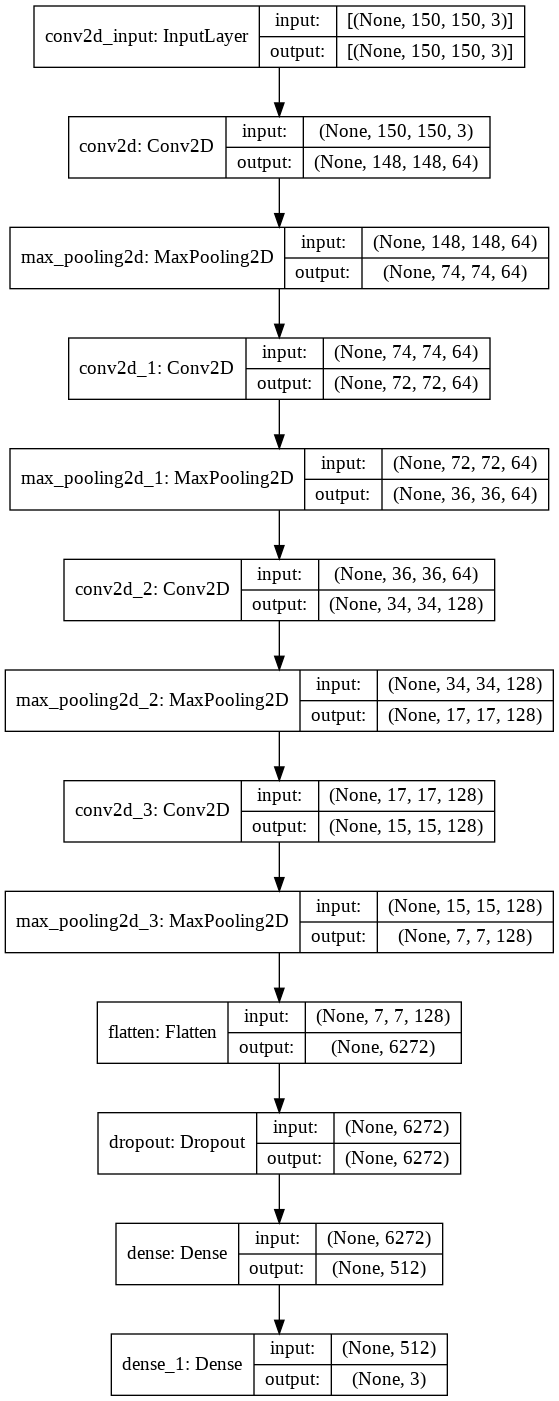

In [ ]:
#tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)